In [ ]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# prompt: CONECTAR EM BANCO DE DADOS POSTGRES DA PLATAFORMA RENDER E EXECUTAR UMA QUERY


# Conexão com o banco de dados
conn = psycopg2.connect(
    host="dpg-cocqqgmv3ddc739kbg3g-a.oregon-postgres.render.com",
    database="db_advz",
    user="postech",
    password='HcoCeCx2iXUk0DqR4Rny1sBlKEFJd0TA'
)

# Cria um cursor para executar as queries
cur = conn.cursor()


In [ ]:
cur.execute("SELECT * FROM ipea;")
rows = cur.fetchall()
dfipea = pd.DataFrame(rows)

dfipea.columns=['data','valor']

dfipea['data'] = pd.to_datetime(dfipea['data'], infer_datetime_format=True)
dfipea.sort_values(by="data", inplace=True,ascending=False)
dfipea

<ipython-input-5-356ecd2bd0cc>:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dfipea['data'] = pd.to_datetime(dfipea['data'], infer_datetime_format=True)


,data,valor
11145,2024-04-15,90.84
11146,2024-04-12,93.12
11147,2024-04-11,91.49
11148,2024-04-10,91.57
11149,2024-04-09,92.13
...,...,...
11140,1987-05-26,18.63
11141,1987-05-25,18.6
11142,1987-05-22,18.55
11143,1987-05-21,18.45


In [ ]:
dfipea = dfipea[dfipea['data'] > '2022']
dfipea

,data,valor
11145,2024-04-15,90.84
11146,2024-04-12,93.12
11147,2024-04-11,91.49
11148,2024-04-10,91.57
11149,2024-04-09,92.13
...,...,...
570,2022-01-07,82.28
571,2022-01-06,81.99
572,2022-01-05,80.6
573,2022-01-04,79.39


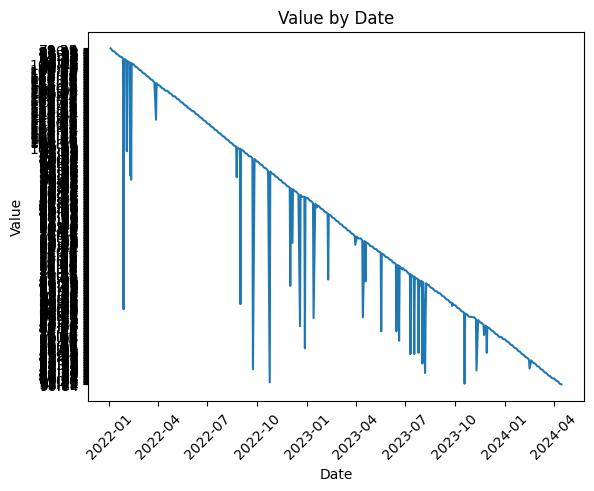

In [ ]:
# Extract the date and value columns
date = dfipea['data']
value = dfipea['valor']

# Create the plot
plt.plot_date(date, value, fmt='-')

# Set the title and axis labels
plt.title('Value by Date')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()